# Zillow Zestimate Prediction

Miloy Ajmera (majmera@andrew.cmu.edu) / 17-634: Applied Machine Learning, Spring 2023

In [1]:
import os
import sklearn
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split

import seaborn as sns  # We'll mostly use seaborn, a stats visualization library
import matplotlib.pyplot as plt  # Seaborn wrap Matplotlib for visualization. We'll occasionaly want to make custom changes to the plots.

# A simple imputer replaces NA & missing values with a simple alternative, like the 
# column mean or the most common element (for categorical data).
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

## Load the Zillow Zestimate Prediction dataset.
Read and prepare the data. Consider how you plan to deal with missing data: will you remove columns, if so, under what conditions? Will you attempt to impute any data?

In [2]:
filepath = "zillow/"
# Load the dataframes
train_2016 = pd.read_csv(filepath + "train_2016.csv", parse_dates=["transactiondate"], low_memory=False)
train_2017 = pd.read_csv(filepath + "train_2017.csv", parse_dates=["transactiondate"], low_memory=False)
properties_2016 = pd.read_csv(filepath + "properties_2016.csv", low_memory=False)
properties_2017 = pd.read_csv(filepath + "properties_2017.csv", low_memory=False)

In [3]:
# Extract different components of the transaction date (year, month, quarter, and day) and storing them in separate columns

# Train data 2016
train_2016["transactiondate_year"] = train_2016["transactiondate"].dt.year
train_2016["transactiondate_month"] = train_2016["transactiondate"].dt.month
train_2016['transactiondate_quarter'] = train_2016['transactiondate'].dt.quarter
train_2016["transactiondate"] = train_2016["transactiondate"].dt.day

# Train data 2016
train_2017["transactiondate_year"] = train_2017["transactiondate"].dt.year
train_2017["transactiondate_month"] = train_2017["transactiondate"].dt.month
train_2017['transactiondate_quarter'] = train_2017['transactiondate'].dt.quarter
train_2017["transactiondate"] = train_2017["transactiondate"].dt.day

In [4]:
# Merge train_2016 with properties_2016
data_2016 = pd.merge(train_2016, properties_2016, on='parcelid', how = 'left')

# Merge train_2017 with properties_2017
data_2017 = pd.merge(train_2017, properties_2017, on='parcelid', how = 'left')


In [5]:
# Concatenate data_2016 and data_2017 into a single dataframe
all = pd.concat([data_2016, data_2017],  ignore_index=True)
print(f'All shape: {all.shape}')


All shape: (167888, 63)


In [6]:
# Create a list of histograms
histogram_columns = all.columns.tolist()
header_columns = ['parcelid', 'logerror', 'transactiondate', 'transactiondate_year', 'transactiondate_month', 'transactiondate_quarter']
ignore_columns = ['hashottuborspa',' propertycountylandusecode','propertyzoningdesc','fireplaceflag','taxdelinquencyflag']

histogram_columns = list(set(histogram_columns) - set(header_columns) - set(ignore_columns))
print(f'Total histograms: {len(histogram_columns)}')


Total histograms: 53


In [7]:
# Print the information of the dataframe
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167888 entries, 0 to 167887
Data columns (total 63 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   parcelid                      167888 non-null  int64  
 1   logerror                      167888 non-null  float64
 2   transactiondate               167888 non-null  int64  
 3   transactiondate_year          167888 non-null  int64  
 4   transactiondate_month         167888 non-null  int64  
 5   transactiondate_quarter       167888 non-null  int64  
 6   airconditioningtypeid         53788 non-null   float64
 7   architecturalstyletypeid      468 non-null     float64
 8   basementsqft                  93 non-null      float64
 9   bathroomcnt                   167854 non-null  float64
 10  bedroomcnt                    167854 non-null  float64
 11  buildingclasstypeid           31 non-null      float64
 12  buildingqualitytypeid         107173 non-nul

## Histogram Analysis for Zillow Dataset
In this code, we create a grid of histograms for each feature in the Zillow dataset using the seaborn histplot function. The histogram_columns list contains the names of the features we want to plot histograms for. 

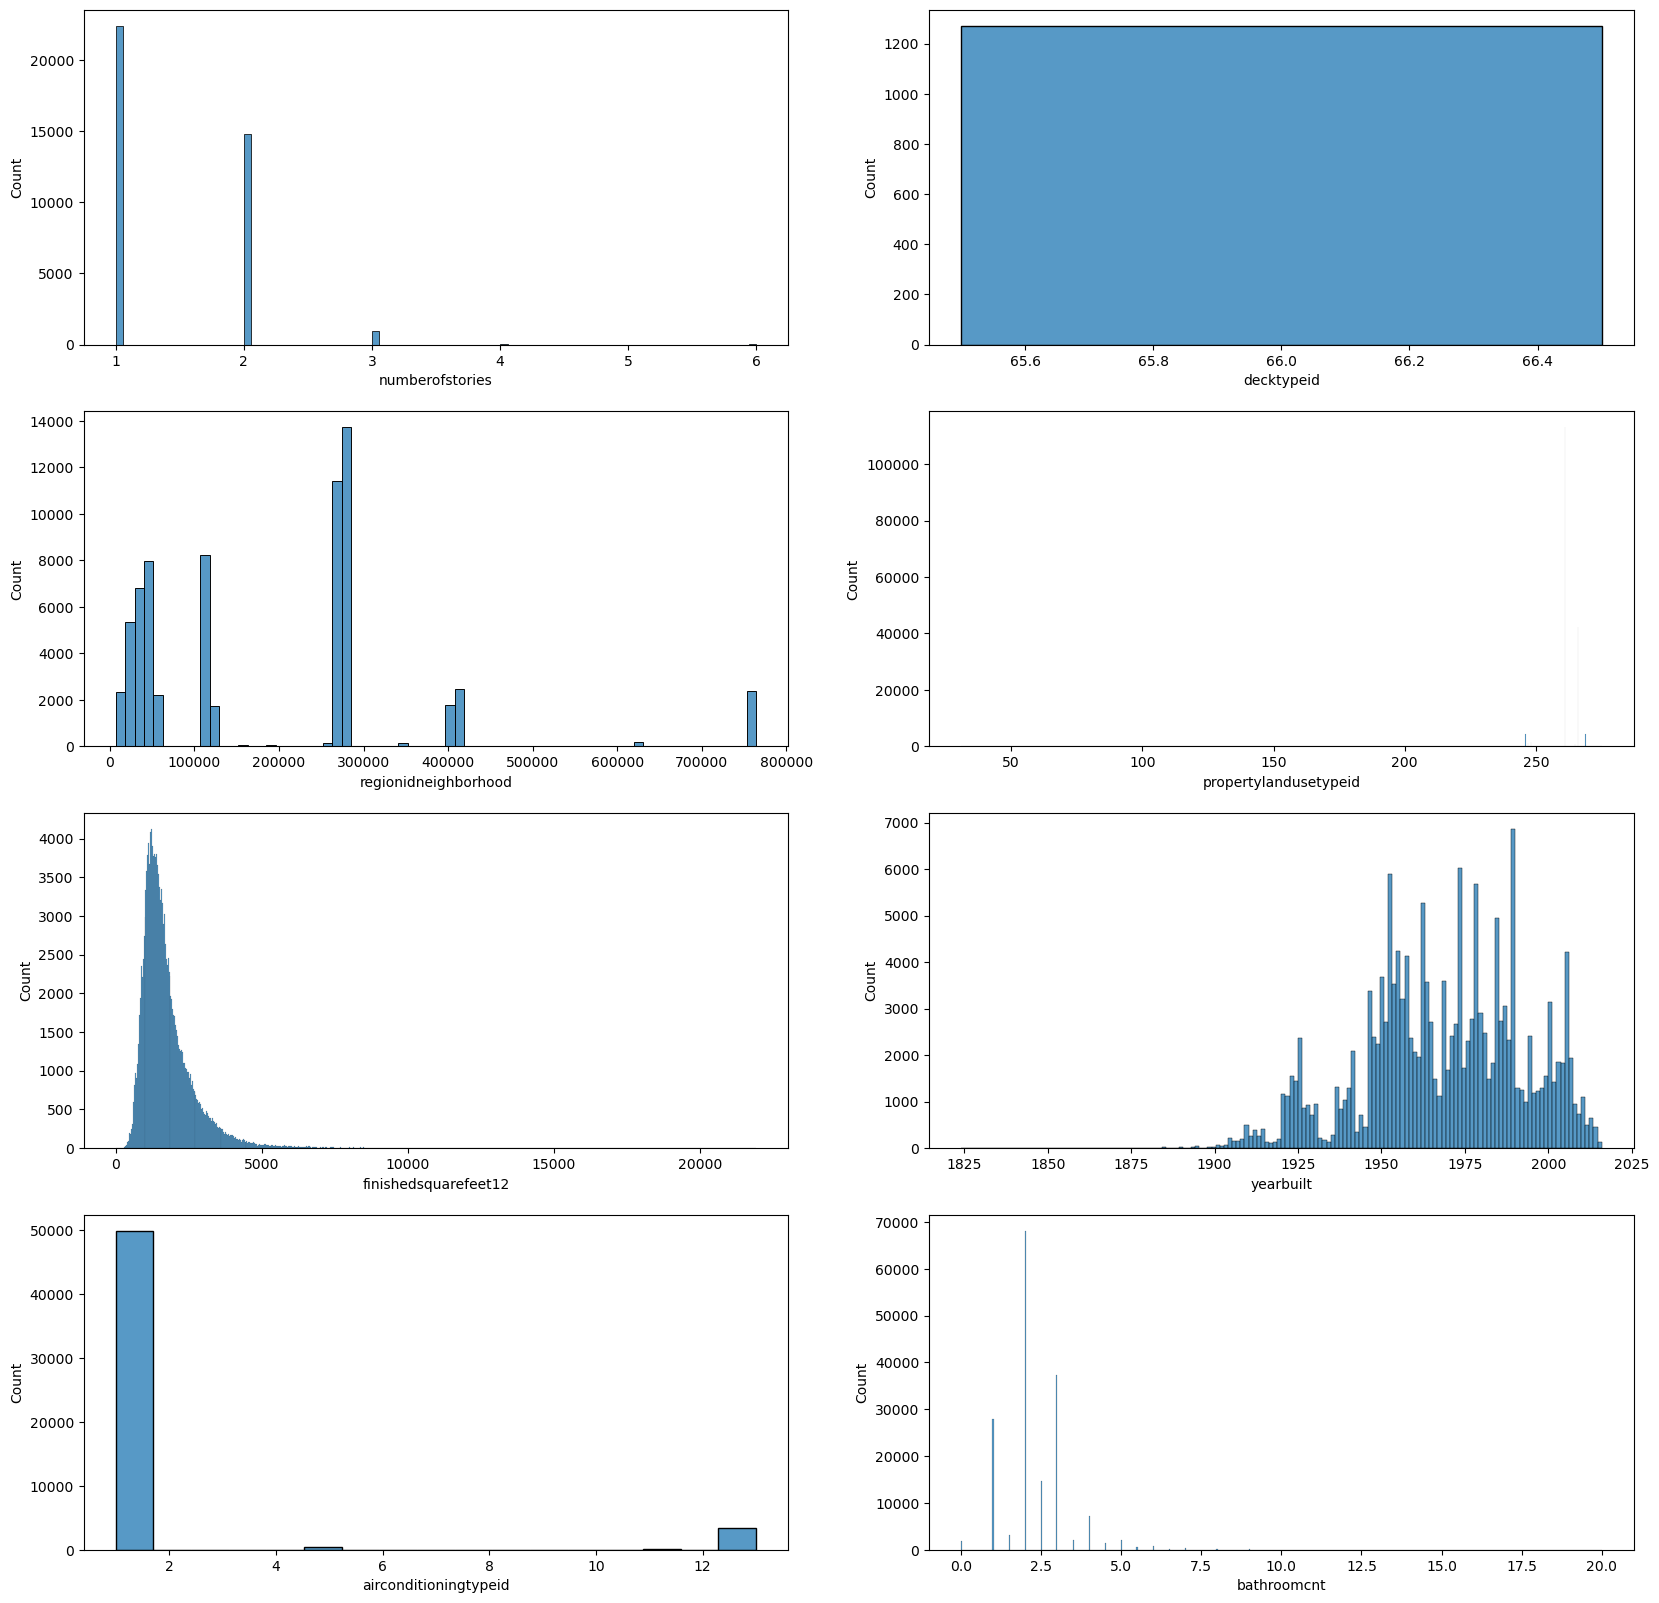

In [8]:
# Let's get a grid of first 8 features up and see what we find.
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))  # Make four rows of 2 plots.
for i, column in enumerate(histogram_columns[0:8]):
    sns.histplot(data=all, x=column, ax=axes[i // 2, i % 2])  # A bit of arithmatic to assign every figure to the correct subplot (axis).


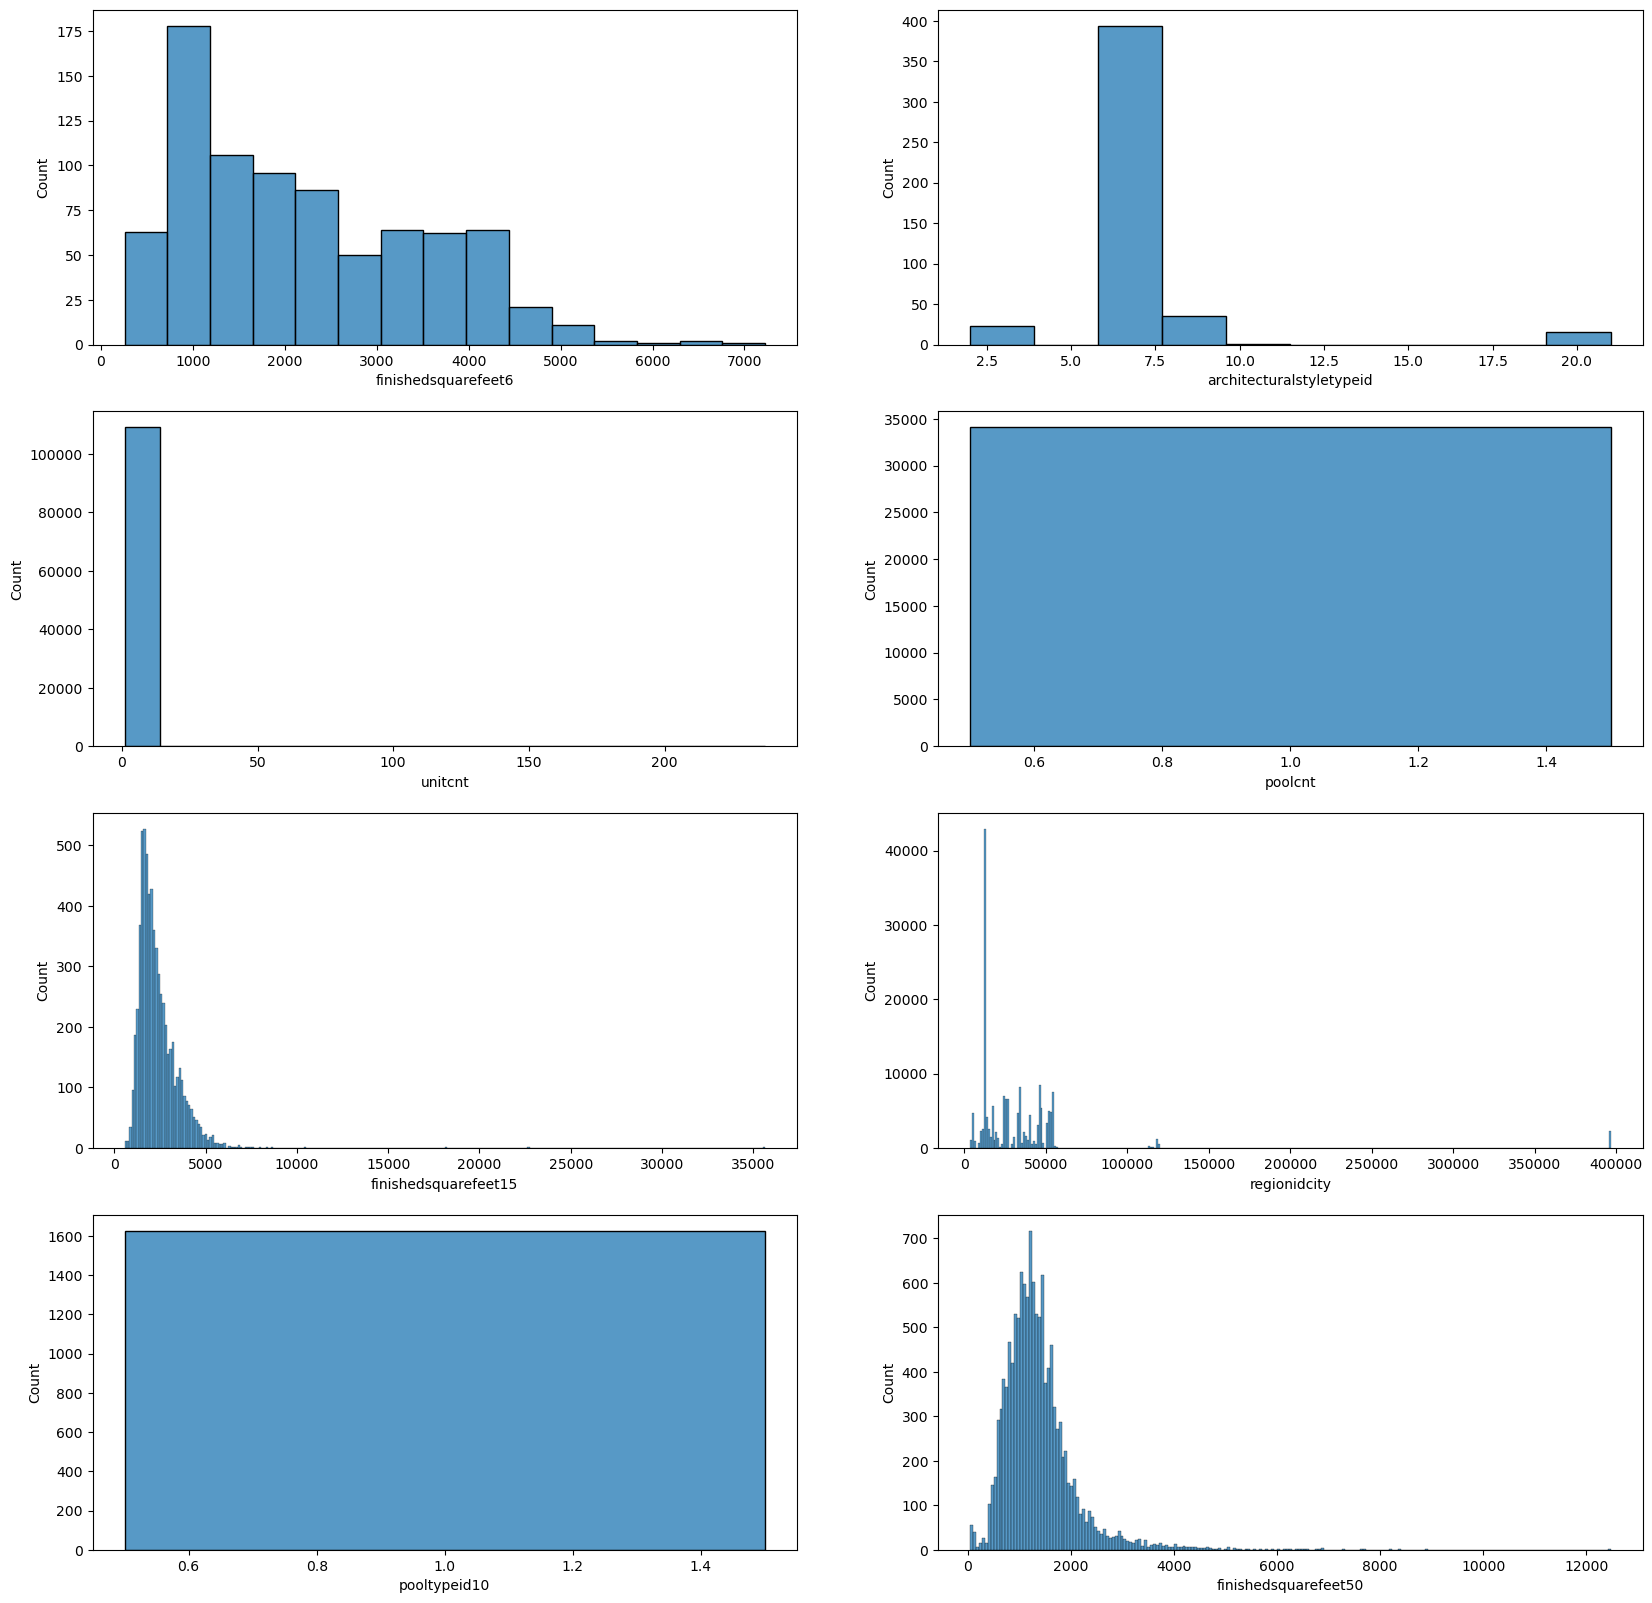

In [9]:
# Let's get a grid of next 8 features up and see what we find.
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))  # Make four rows of 2 plots.
for i, column in enumerate(histogram_columns[8:16]):
    sns.histplot(data=all, x=column, ax=axes[i // 2, i % 2])  # A bit of arithmatic to assign every figure to the correct subplot (axis).


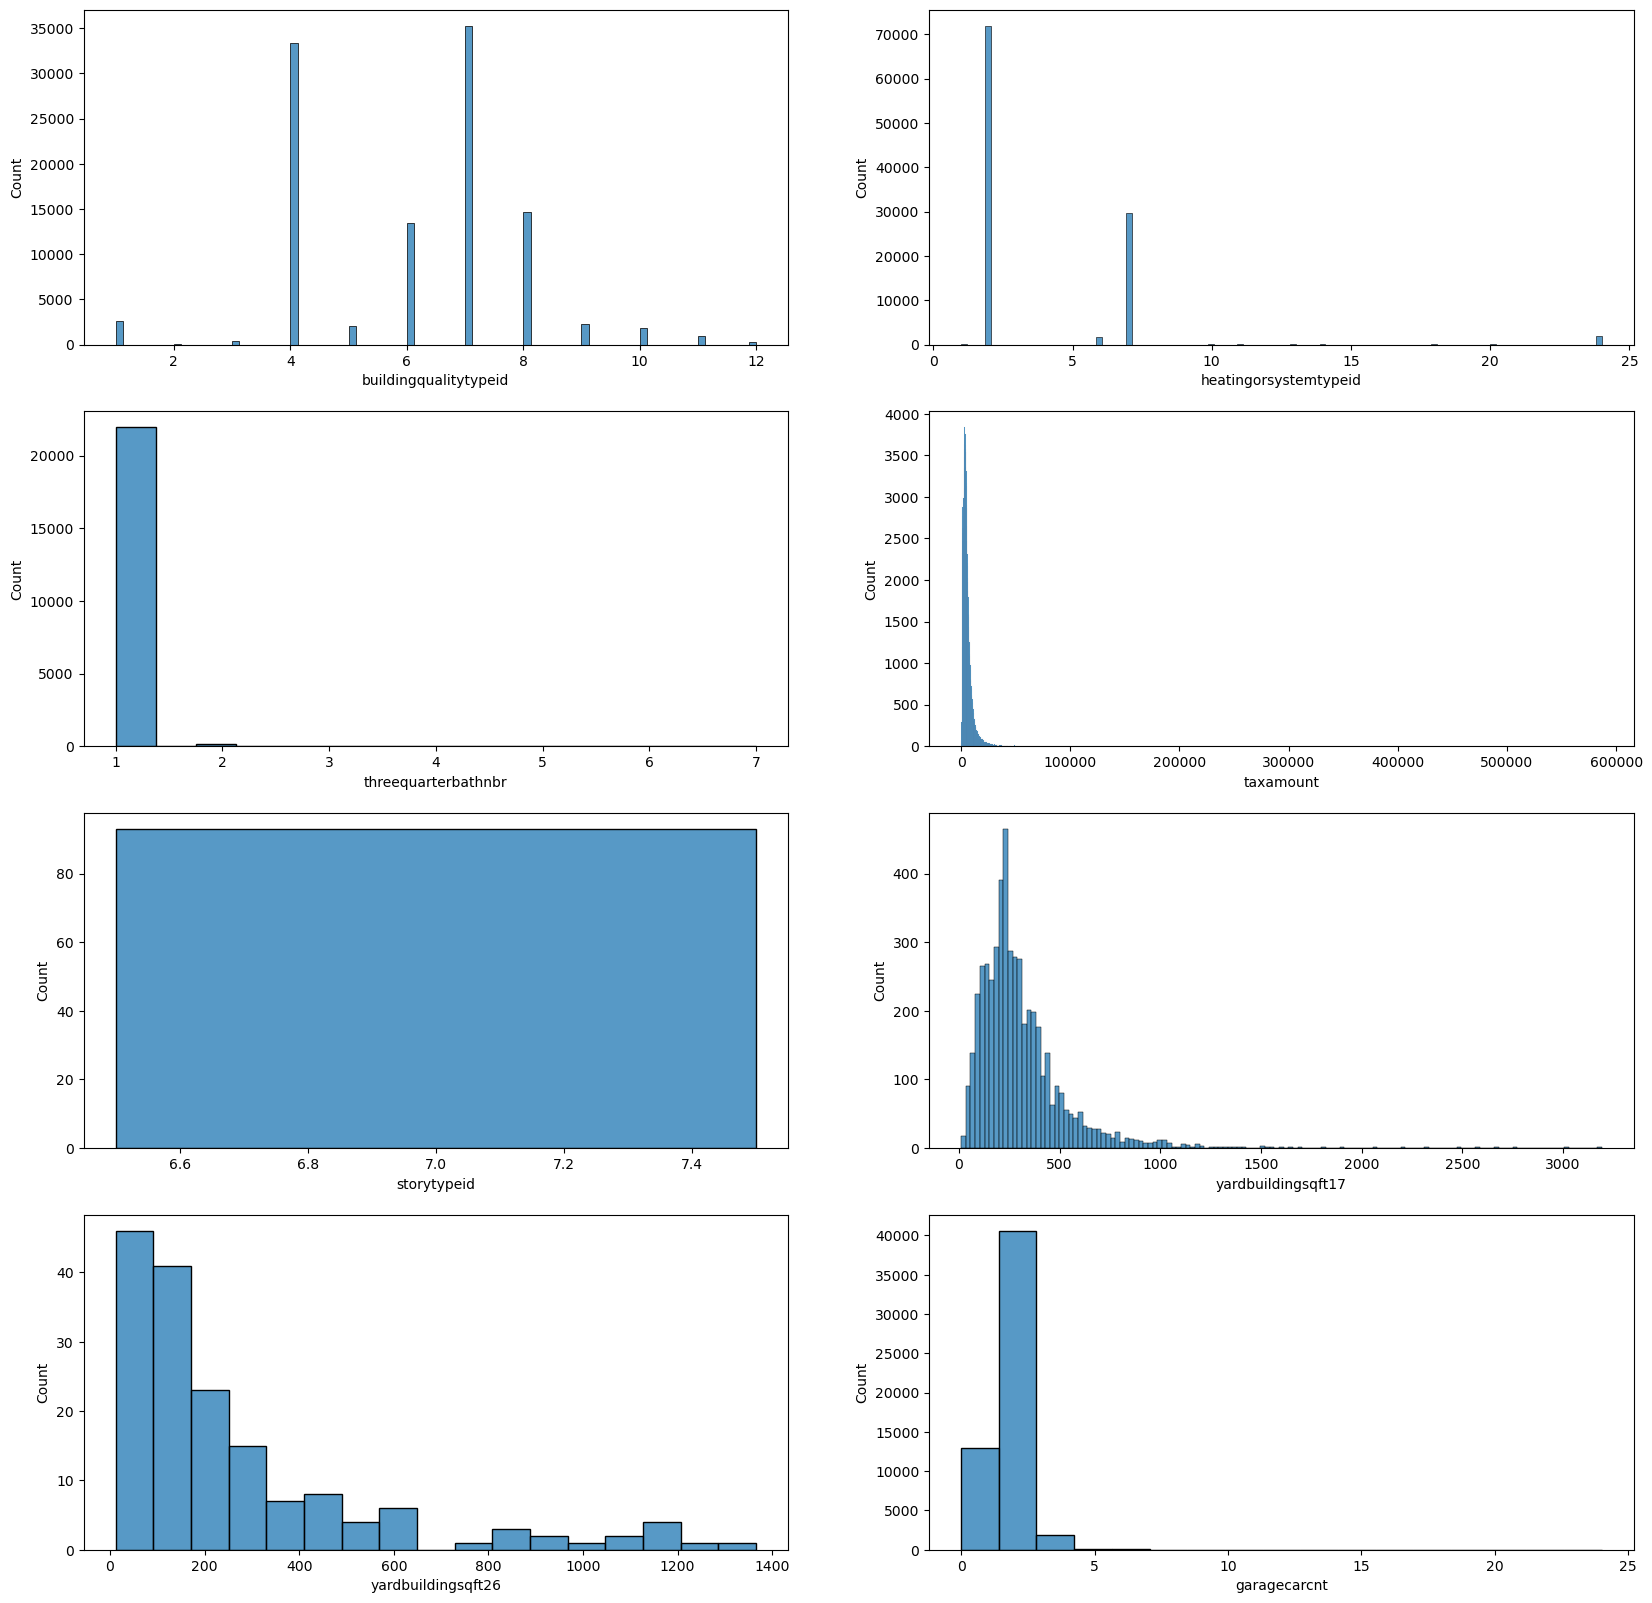

In [10]:
# Let's get a grid of next 8 features up and see what we find.
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))  # Make four rows of 2 plots.
for i, column in enumerate(histogram_columns[16:24]):
    sns.histplot(data=all, x=column, ax=axes[i // 2, i % 2])  # A bit of arithmatic to assign every figure to the correct subplot (axis).


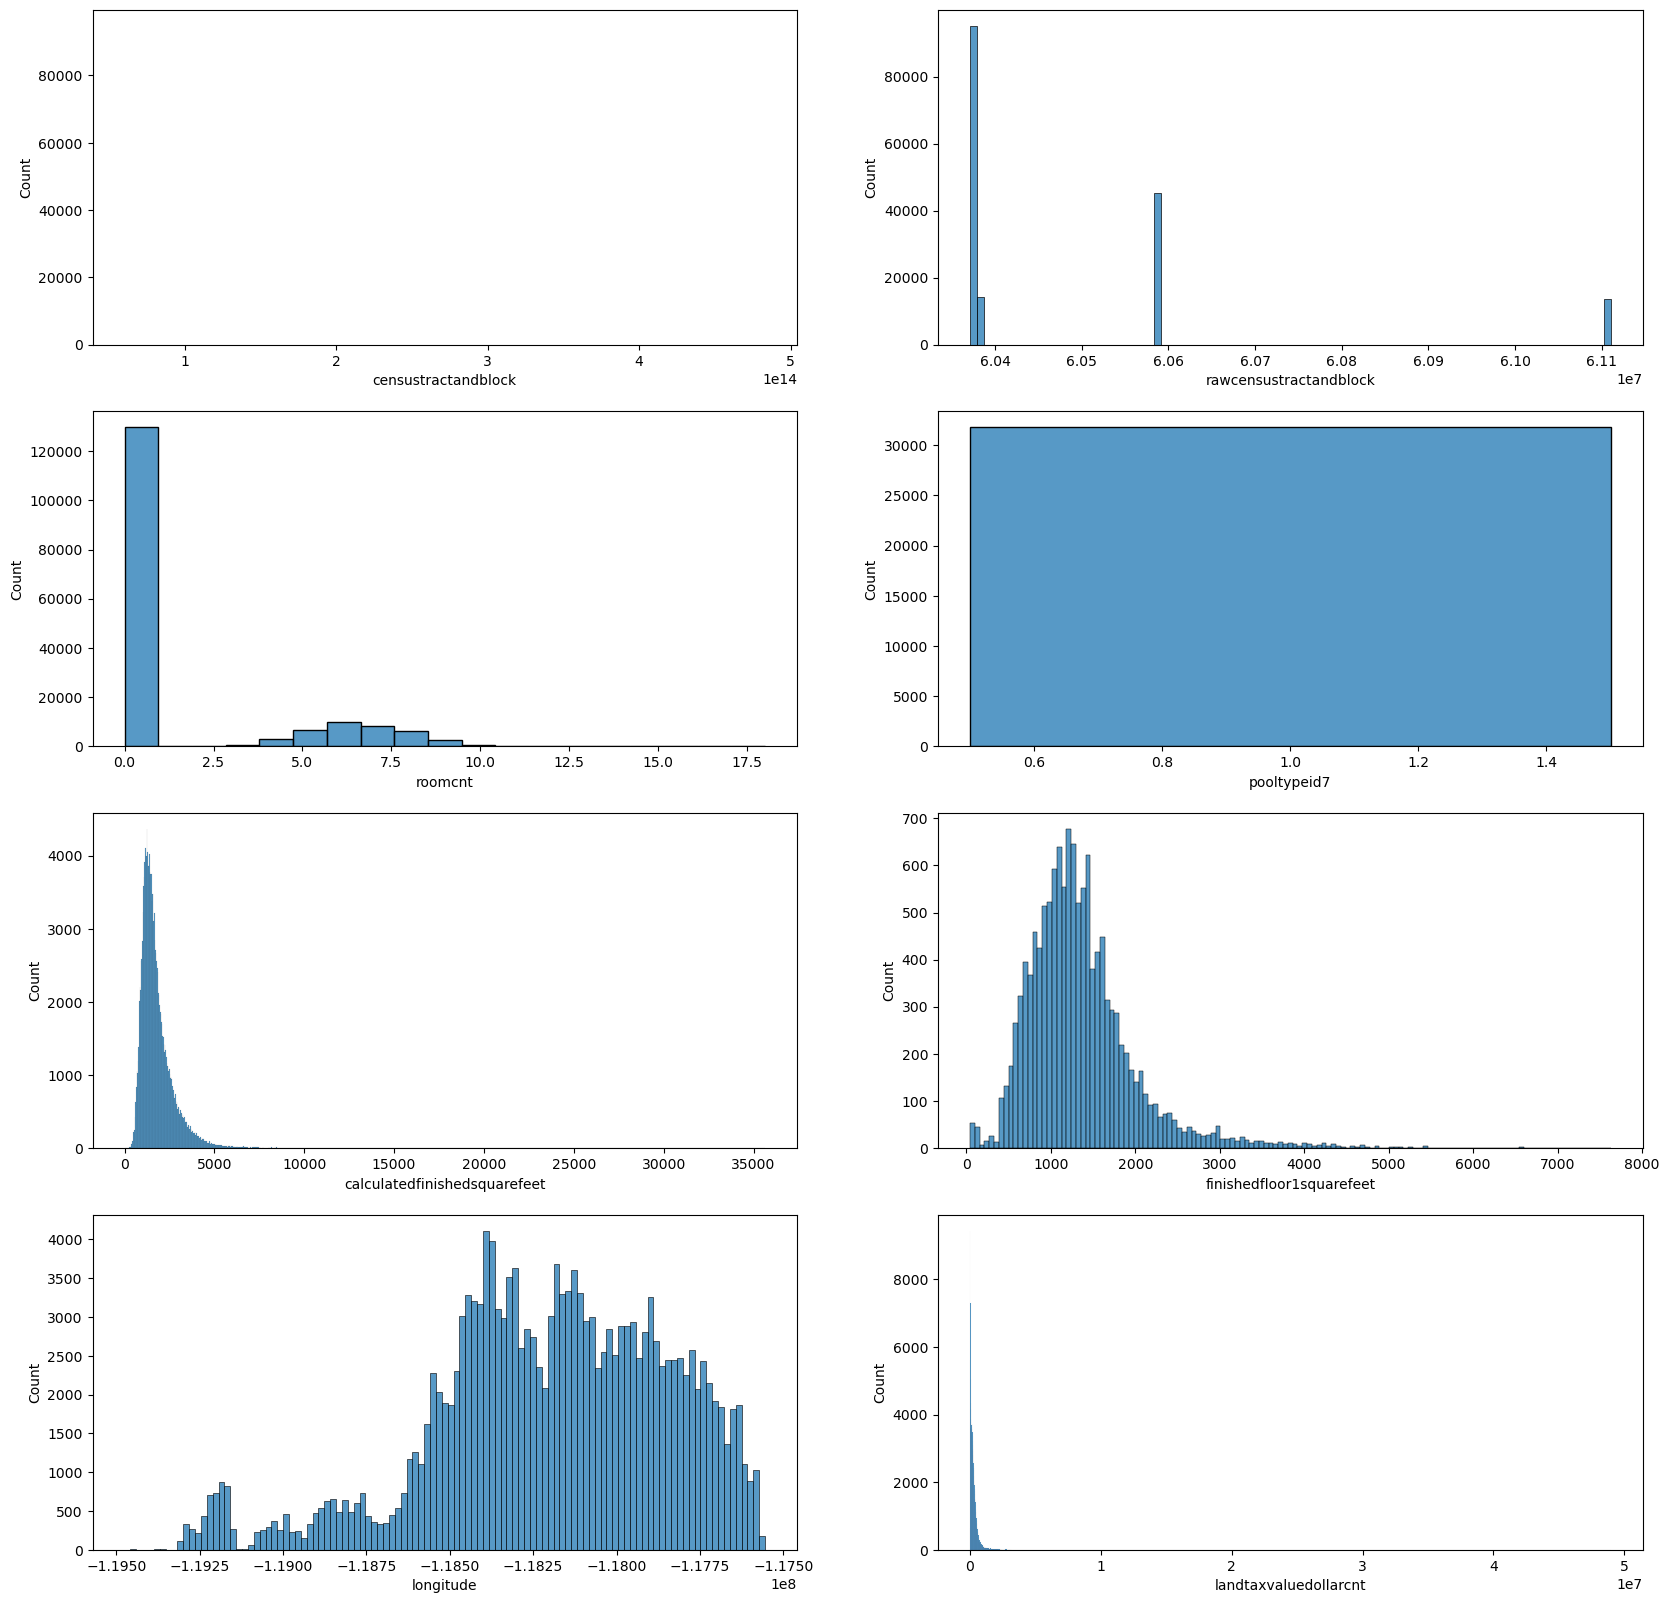

In [11]:
# Let's get a grid of next 8 features up and see what we find.
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))  # Make four rows of 2 plots.
for i, column in enumerate(histogram_columns[24:32]):
    sns.histplot(data=all, x=column, ax=axes[i // 2, i % 2])  # A bit of arithmatic to assign every figure to the correct subplot (axis).


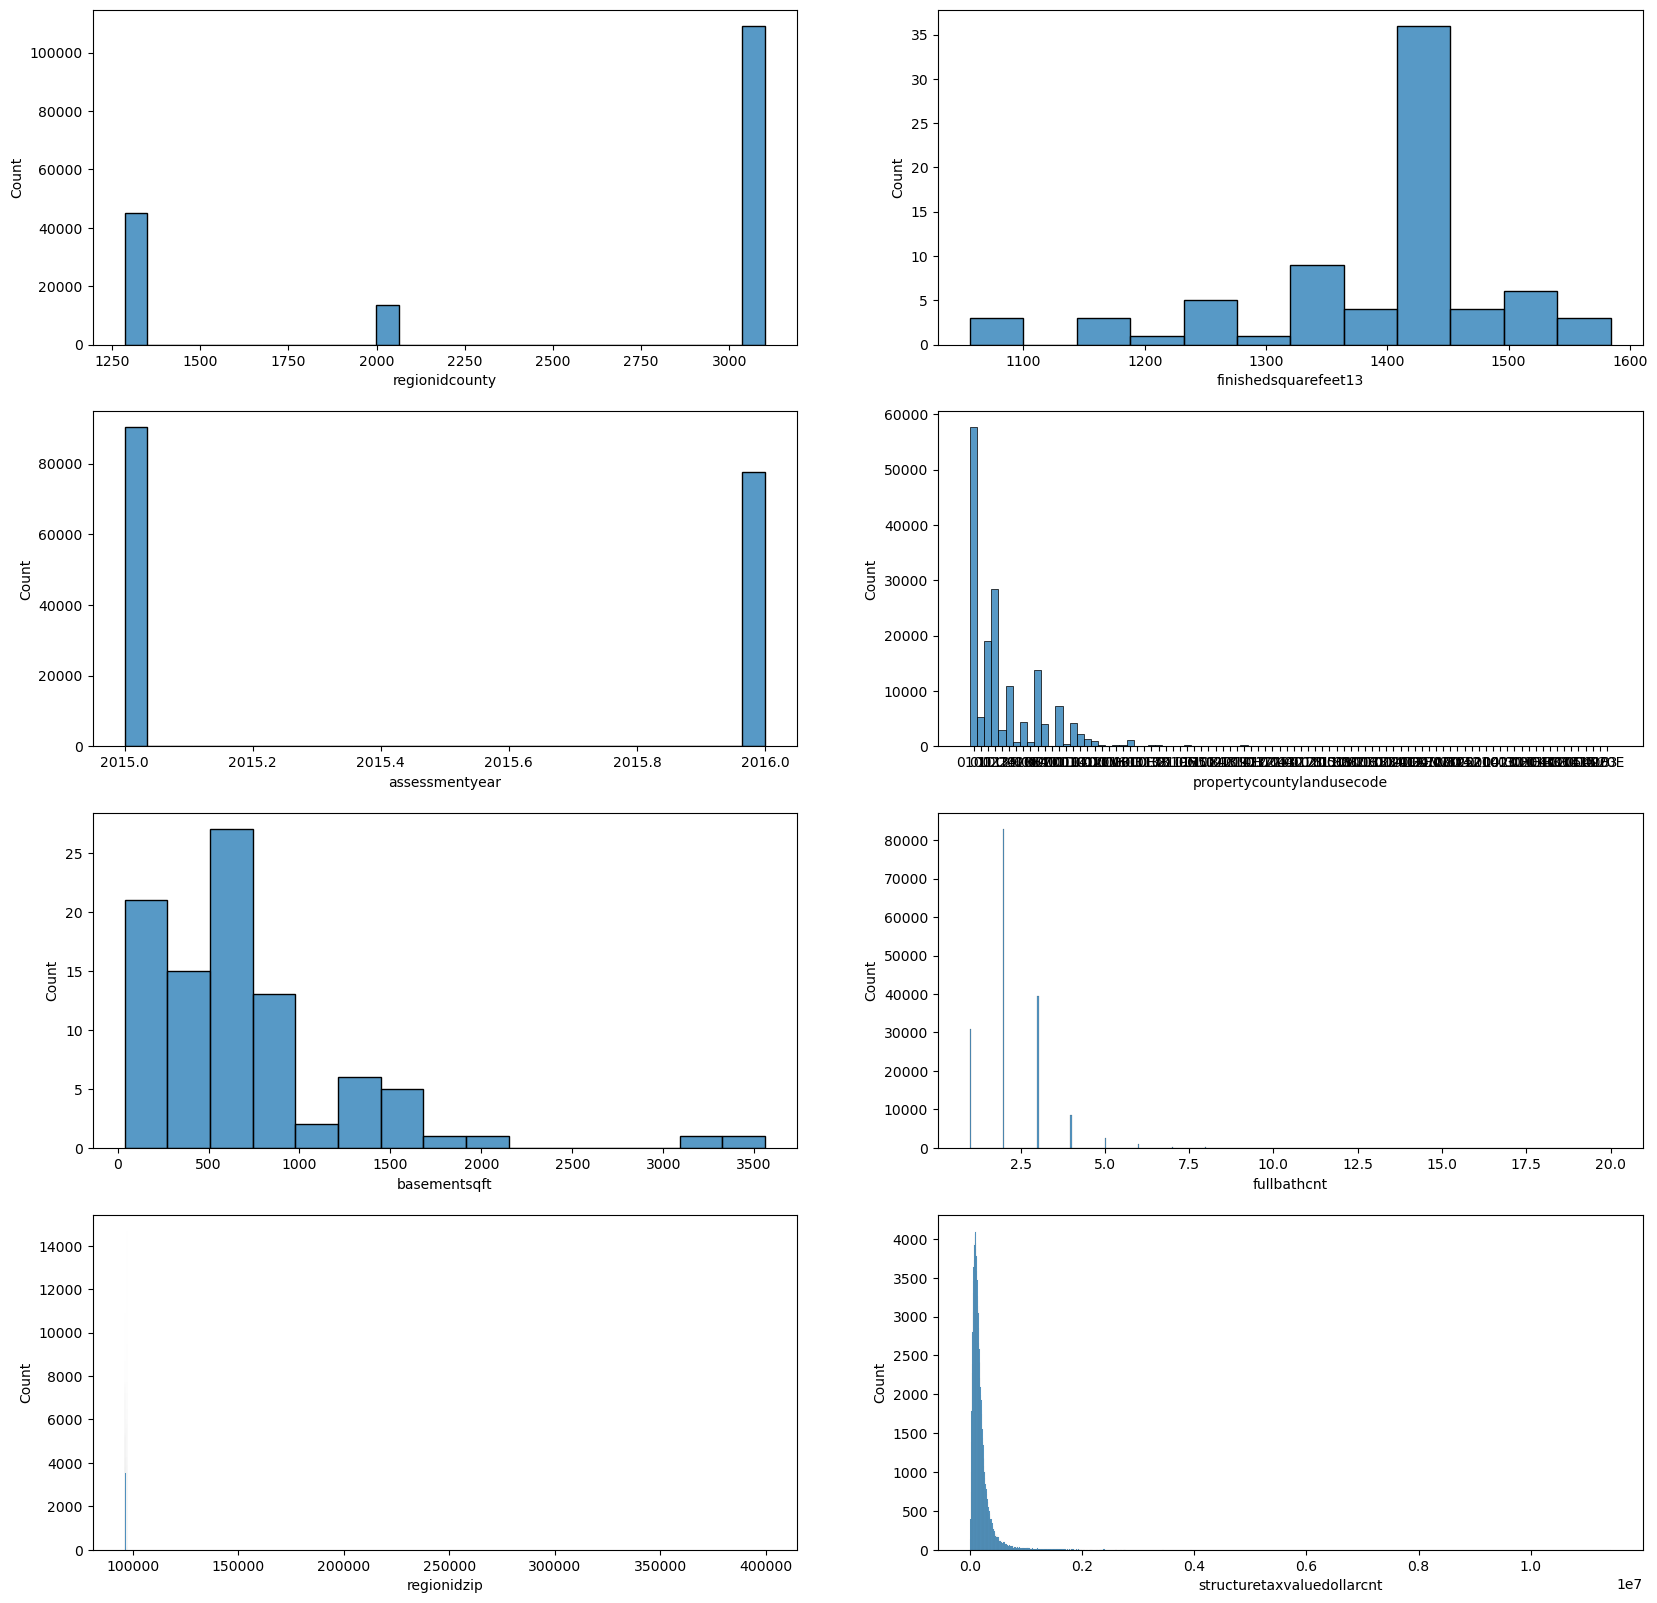

In [12]:
# Let's get a grid of next 8 features up and see what we find.
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))  # Make four rows of 2 plots.
for i, column in enumerate(histogram_columns[32:40]):
    sns.histplot(data=all, x=column, ax=axes[i // 2, i % 2])  # A bit of arithmatic to assign every figure to the correct subplot (axis).


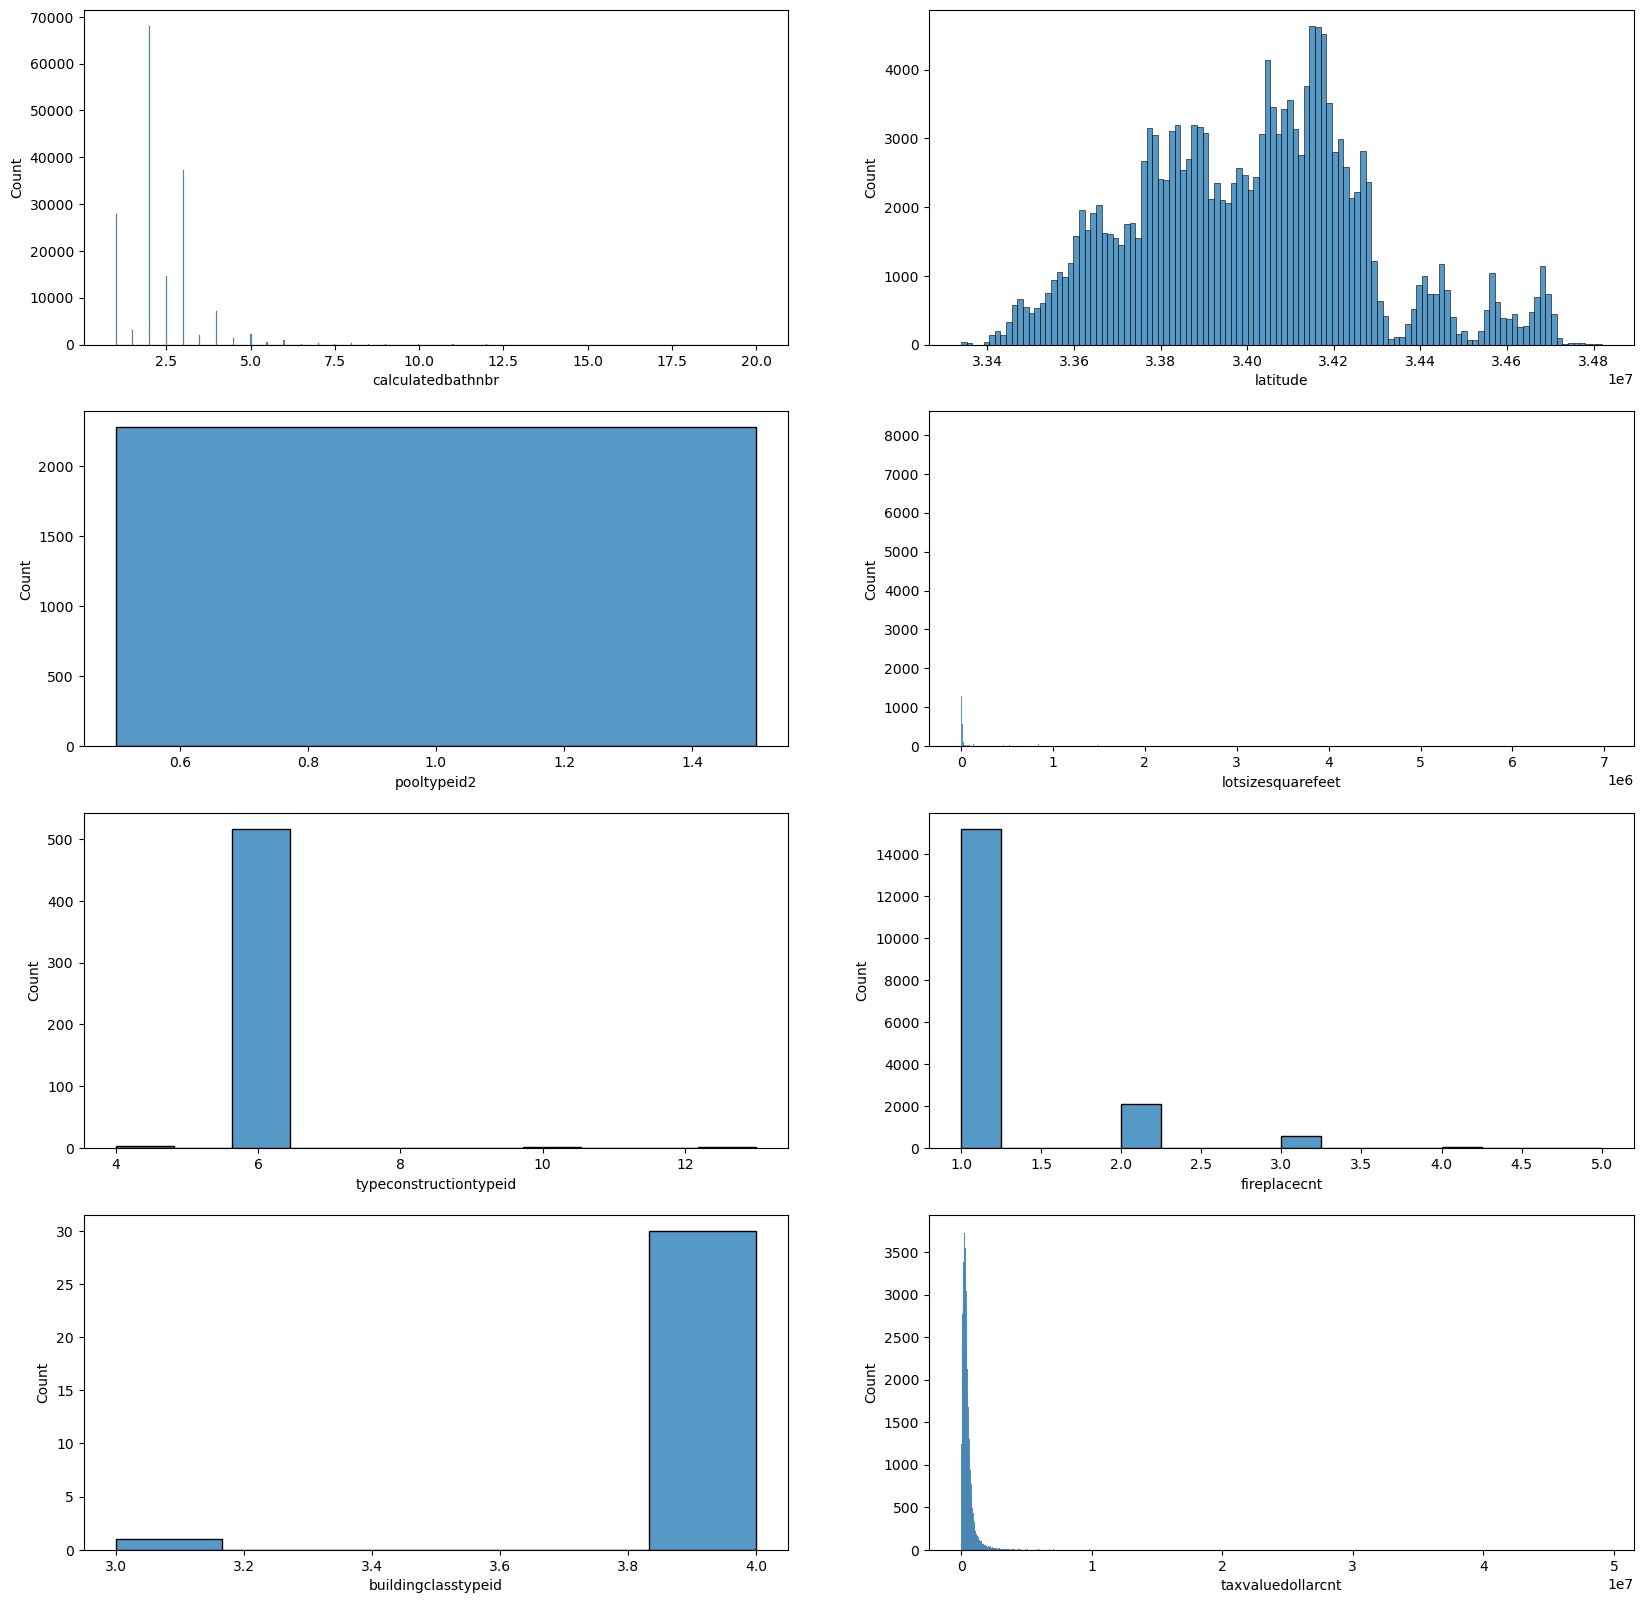

In [13]:
# Let's get a grid of next 8 features up and see what we find.
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))  # Make four rows of 2 plots.
for i, column in enumerate(histogram_columns[40:48]):
    sns.histplot(data=all, x=column, ax=axes[i // 2, i % 2])  # A bit of arithmatic to assign every figure to the correct subplot (axis).


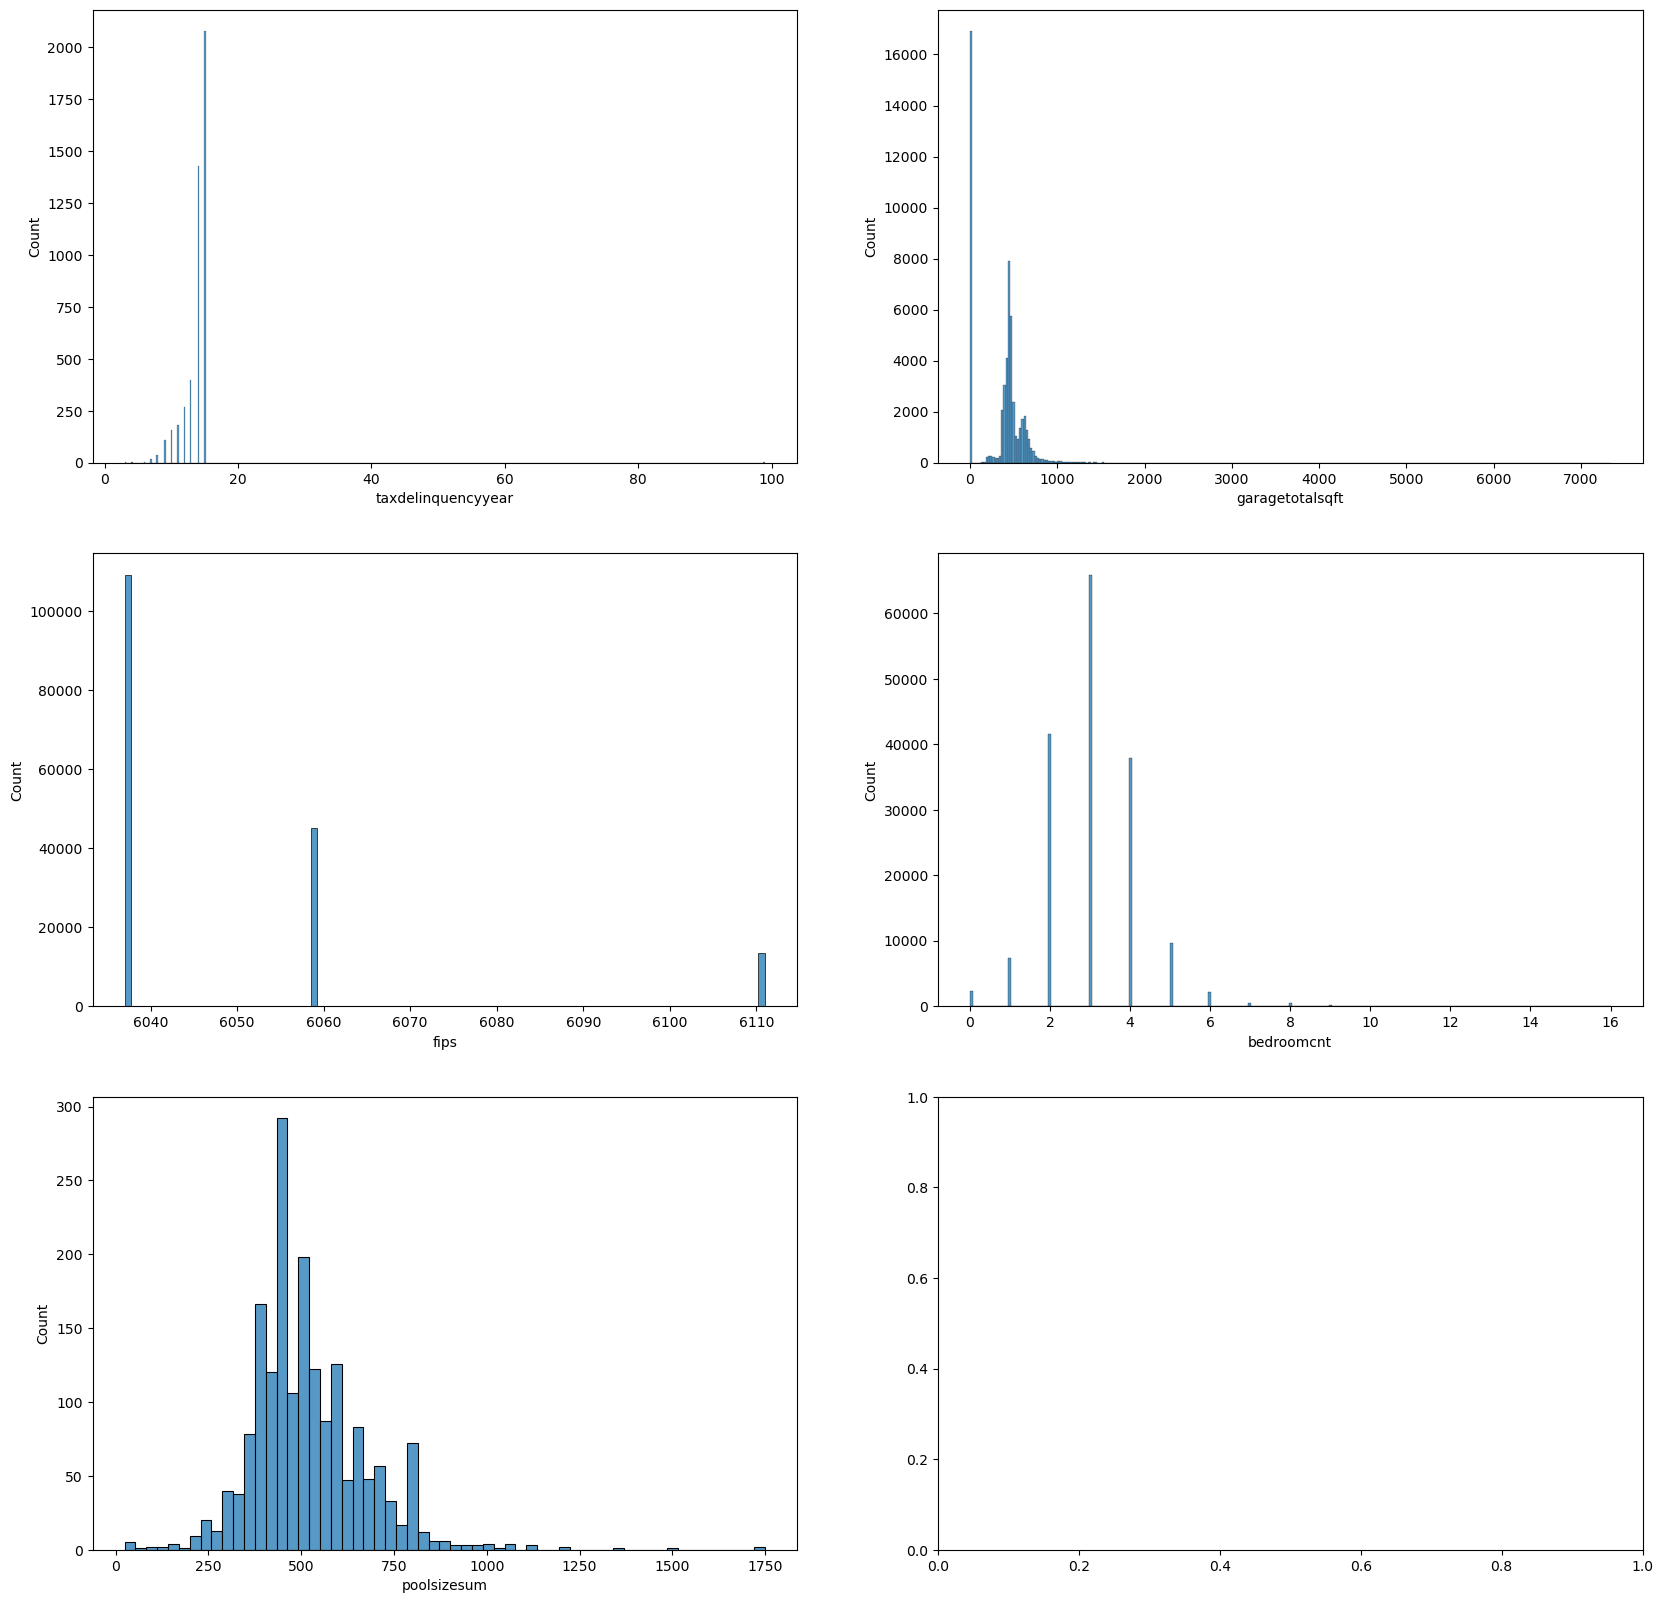

In [14]:
# Let's get a grid of next 8 features up and see what we find.
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))  # Make four rows of 2 plots.
for i, column in enumerate(histogram_columns[48:]):
    sns.histplot(data=all, x=column, ax=axes[i // 2, i % 2])  # A bit of arithmatic to assign every figure to the correct subplot (axis).


## Missing Value Analysis for Zillow Dataset
In this code, we calculate the number and percentage of missing values in each column of the Zillow dataset using the isna and sum functions. We then concatenate these values into a new dataframe, miss_df, and sort it in descending order by the percentage of missing values. We select only the columns with more than 90% missing values and display them in the miss_df dataframe. This information can be useful for identifying which columns have the most missing data, and for deciding how to handle these missing values in subsequent data preprocessing steps.

In [15]:
# How many rows having missing values, by column?
missing_values = all.isna().sum()
missing_percentages = (missing_values / len(all)) * 100

miss_df = pd.concat([missing_values, missing_percentages], axis=1, keys=['Missing counts', 'Missing percentages'])
miss_df = miss_df.sort_values(['Missing percentages', 'Missing counts'], ascending=False)

# miss_df = miss_df[miss_df['Missing percentages'] > 90]
miss_df


,Missing counts,Missing percentages
buildingclasstypeid,167857,99.981535
finishedsquarefeet13,167813,99.955327
basementsqft,167795,99.944606
storytypeid,167795,99.944606
yardbuildingsqft26,167723,99.901720
...,...,...
logerror,0,0.000000
transactiondate,0,0.000000
transactiondate_year,0,0.000000
transactiondate_month,0,0.000000


In [16]:
# Remove all the NaN values
drop_na_subset = list(set(histogram_columns) - set(header_columns))
all.dropna(subset=drop_na_subset, how='all', inplace=True)

print(f'All shape: {all.shape}')

All shape: (167854, 63)


In [17]:
# Fill NaN values in fireplacecnt, airconditioningtypeid, regionidcity with zeros
fill_zeros = ['airconditioningtypeid', 'decktypeid', 'fireplacecnt', 'poolcnt','regionidcity']
for fill_zero in fill_zeros:
    all[fill_zero].fillna(0, inplace=True)


In [18]:
# Fill NaN values in fireplaceflag, taxdelinquencyflag with zeros
all['fireplaceflag'] = all['fireplaceflag'].apply(lambda x: 0 if pd.isna(x) else x)
all['taxdelinquencyflag'] = all['taxdelinquencyflag'].apply(lambda x: 0 if pd.isna(x) else x)
all['fireplaceflag'] = all['fireplaceflag'].apply(lambda x: 1 if x == True else x)
all['taxdelinquencyflag'] = all['taxdelinquencyflag'].apply(lambda x: 1 if x == "Y" else x)


In [19]:
# Remove architecturalstyletypeid, basementsqft, buildingqualitytypeid since the count of null values is too high
all.drop('architecturalstyletypeid', axis=1, inplace=True)
all.drop('basementsqft', axis=1, inplace=True)
all.drop('buildingclasstypeid', axis=1, inplace=True)
# Remove calculatedbathnbr, fullbathcnt since bathroomcnt provides the same information
all.drop('calculatedbathnbr', axis=1, inplace=True)
all.drop('fullbathcnt', axis=1, inplace=True)


In [20]:
# Fill in calculatedfinishedsquarefeet and finishedsquarefeet12
all['calculatedfinishedsquarefeet'] = all[['calculatedfinishedsquarefeet', 'finishedsquarefeet12']].max(axis=1)
# Remove finishedsquarefeet12 since calculatedfinishedsquarefeet provides the same information
all.drop('finishedsquarefeet12', axis=1, inplace=True)
# Remove squarefeet columns since calculatedfinishedsquarefeet provides the same information
all.drop('finishedsquarefeet13', axis=1, inplace=True)
all.drop('finishedsquarefeet6', axis=1, inplace=True)
all.drop('finishedsquarefeet15', axis=1, inplace=True)
all.drop('finishedfloor1squarefeet', axis=1, inplace=True)
all.drop('finishedsquarefeet50', axis=1, inplace=True)


In [21]:
# Fill inconsistent Garage SquareFeetData
all['garagetotalsqft'] = all['garagetotalsqft'].replace(0, np.nan)
# Impute the garagecarcnt and garagetotalsqft with Median values
imp = SimpleImputer(strategy="median")  # Using most-frequent for categorical data.
all[['garagecarcnt']] = imp.fit_transform(all[['garagecarcnt']])
# Impute the garagecarcnt and garagetotalsqft with Mean values
imp = SimpleImputer(strategy='mean')
all[['garagetotalsqft']] = imp.fit_transform(all[['garagetotalsqft']])

In [22]:
# Impute the lotsizesquarefeet, taxamount, landtaxvaluedollarcnt, taxvaluedollarcnt and lotsizesquarefeet with Mean values
imp = SimpleImputer(strategy='mean')
all[['lotsizesquarefeet']] = imp.fit_transform(all[['lotsizesquarefeet']])
all[['taxamount']] = imp.fit_transform(all[['taxamount']])
all[['landtaxvaluedollarcnt']] = imp.fit_transform(all[['landtaxvaluedollarcnt']])
all[['structuretaxvaluedollarcnt']] = imp.fit_transform(all[['structuretaxvaluedollarcnt']])
all[['taxvaluedollarcnt']] = imp.fit_transform(all[['taxvaluedollarcnt']])
all[['lotsizesquarefeet']] = imp.fit_transform(all[['lotsizesquarefeet']])


In [23]:
# Impute the yearbuilt, censustractandblock with KNN values
imp = KNNImputer(n_neighbors=3)
all[['yearbuilt']] = imp.fit_transform(all[['yearbuilt']])
all[['censustractandblock']] = imp.fit_transform(all[['censustractandblock']])

In [24]:
# Fill inconsistent Pools Data
pool_cols = ['poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7']
imp = KNNImputer(n_neighbors=3)
all[pool_cols] = imp.fit_transform(all[pool_cols])


In [25]:
# Fill inconsistent buildingqualitytypeid, numberofstories & unitcnt Data
stories_cols = ['bathroomcnt', 'bedroomcnt', 'roomcnt', 'unitcnt', 
                    'calculatedfinishedsquarefeet', 'numberofstories', 'buildingqualitytypeid']
imp = KNNImputer(n_neighbors=3)
all[stories_cols] = imp.fit_transform(all[stories_cols])

In [26]:
# Fill inconsistent regionidneighborhood & regionidzip Data
region_cols = ['regionidcounty', 'regionidcity', 'regionidneighborhood', 'regionidzip']
imp = KNNImputer(n_neighbors=3)
all[region_cols] = imp.fit_transform(all[region_cols])


In [27]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical columns to numerical values
le = LabelEncoder()
all['propertycountylandusecode'] = le.fit_transform(all['propertycountylandusecode'])
all['propertyzoningdesc'] = le.fit_transform(all['propertyzoningdesc'])

# Fill inconsistent heatingorsystemtypeid, propertyzoningdesc & propertycountylandusecode Data
heating_cols = ['garagecarcnt', 'garagetotalsqft', 'heatingorsystemtypeid', 
                'propertyzoningdesc', 'propertycountylandusecode']
imp = KNNImputer(n_neighbors=3)
all[heating_cols] = imp.fit_transform(all[heating_cols])


In [28]:
# How many rows having missing values, by column?
missing_values = all.isna().sum()
missing_percentages = (missing_values / len(all)) * 100

miss_df = pd.concat([missing_values, missing_percentages], axis=1, keys=['Missing counts', 'Missing percentages'])
miss_df = miss_df.sort_values(['Missing percentages', 'Missing counts'], ascending=False)

miss_df


,Missing counts,Missing percentages
storytypeid,167761,99.944595
yardbuildingsqft26,167689,99.901700
typeconstructiontypeid,167332,99.689015
hashottuborspa,163950,97.674169
taxdelinquencyyear,163171,97.210075
yardbuildingsqft17,162815,96.997986
threequarterbathnbr,145739,86.824860
parcelid,0,0.000000
logerror,0,0.000000
transactiondate,0,0.000000


In [ ]:
# Drop all columns with missing values > 90%
all.drop(miss_df.index, axis=1, inplace=True)
all.info()

## Correlation Analysis for Zillow Dataset
In this code, we first compute the correlation matrix for all the features in the Zillow dataset using the corr function. The resulting correlation matrix is stored in the correlation variable.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = all.corr()
correlation

plt.figure(figsize=(20,20))

sns.heatmap(correlation, annot=True)


In [ ]:
correlation_features_list = correlation['logerror'].sort_values(ascending=False)
correlation_features_list

In [ ]:
# Drop all columns with no correlation with logerror -> poolcnt, pooltypeid7
all.drop(['poolcnt', 'pooltypeid7'], axis=1, inplace=True)
all.info()

In [ ]:
correlation = all.corr()
correlation

plt.figure(figsize=(20,20))

sns.heatmap(correlation, annot=True)

## Zillow Dataset Analysis with Imputation
In this analysis, we explore the Zillow dataset with missing values and perform imputation using two different methods: SimpleImputer and KNNImputer.

In [ ]:
# How many rows having missing values, by column?
missing_values = all.isna().sum()
missing_percentages = (missing_values / len(all)) * 100

miss_df = pd.concat([missing_values, missing_percentages], axis=1, keys=['Missing counts', 'Missing percentages'])
miss_df = miss_df.sort_values(['Missing percentages', 'Missing counts'], ascending=False)

miss_df

In [ ]:
all.drop(columns=["transactiondate"],inplace=True)
all.set_index('parcelid',inplace= True)
all.head()

y_all = all[['logerror']]
x_all = all.drop('logerror', axis=1).copy()

## Splitting Zillow Dataset into Train and Test Dataframes
This code snippet splits the concatenated Zillow dataframe x_all into separate training and testing dataframes using the train_test_split() function from scikit-learn. The test_size parameter is set to 0.51, which specifies that 51% of the data should be used for testing, and the remaining 49% should be used for training. The function returns four dataframes: X_train (training features), X_test (testing features), y_train (training targets), and y_test (testing targets). The shape attribute is used to print the number of rows in each dataframe.

In [ ]:
# Split the concatenated dataframe into train and test dataframes
X_train, X_test, y_train, y_test  = train_test_split(x_all, y_all, test_size=0.51)
# X_train, X_test, y_train, y_test  = train_test_split(all, test_size=0.51, random_state=5, shuffle=True)

# Print the number of rows in each dataframe
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

## Linear Regression Model Training and Evaluation

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

# Define the LinearRegression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('Mean squared error:', mse)
print('Mean absolute error:', mae)


## RandomForestRegressor Model Training and Evaluation

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

# Define the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=0)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('Mean squared error:', mse)
print('Mean absolute error:', mae)


In [ ]:
import numpy as np
# Print model to pickle file
    
with open(r'zillow.model', 'wb') as f:
    pickle.dump(rf_model, f)

## Experimentation - Additional ML models - Exploration

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the XGBoost model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=5)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the results
print('Mean squared error:', mse)
print('Mean absolute error:', mae)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Create a GradientBoostingRegressor model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('Mean squared error:', mse)
print('Mean absolute error:', mae)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Let's run a grid search over the various kernels. Note that C < 1 would yield
# stronger regularization for very noisy data, while increasing it allows for
# more slack. Larger C can also take much longer to train.
param_grid = [
	{'kernel': ['rbf'], 'C': [1, 10, 100, 1000]},
	{'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
  {'kernel': ['poly'], 'C': [1, 10, 100, 1000], 'degree': [2, 3]},
  {'kernel': ['sigmoid'], 'C': [1, 10, 100, 1000]}]

# Note: using very low CV value for faster exploration. Not generally recommended.
# Even then, this will run for a while. I removed the C=1000 option to speed
# things up (quite significantly) since it didn't improve accuracy over C=100 anyways.
search = GridSearchCV(model, param_grid, cv=2, scoring='accuracy', n_jobs=-1)
search.fit(X_train, y_train)


In [ ]:
# Print scores for each parameter setting
for mean, std, params in zip(
	search.cv_results_['mean_test_score'], 
	search.cv_results_['std_test_score'],
	search.cv_results_['params']):
	print(f'{mean:0.3f} (+/-{std ** 2:0.03f}) for {params}')


In [ ]:
# Let's make a plot to get some more clarity in to the relationship here.
from collections import defaultdict

# Group the results into X/Y pairs by kernel type.
lines = defaultdict(list)
for params, mean in zip(search.cv_results_['params'], search.cv_results_['mean_test_score']):
  key = params['kernel']
  if key == 'poly':
    key += f'-{params["degree"]}'
  lines[key].append((params['C'], mean))

# Plot all results
plt.rcParams.update({'figure.figsize': (8, 8)})
fig = plt.figure()
ax = fig.add_subplot(111)
colors = ['r', 'g', 'b', 'k', 'y']
for ix, (key, values) in enumerate(lines.items()):
  X, Y = list(zip(*sorted(values, key=lambda e: e[0])))
  ax.scatter(X, Y, c=colors[ix], label=key)
  ax.plot(X, Y, c=colors[ix])
ax.set_xscale('log')
plt.legend()

In [ ]:
check = pd.concat([data_2016, data_2017],  ignore_index=True)
value_counts = check['structuretaxvaluedollarcnt'].value_counts()
print(value_counts)
check.describe()